# Your Name Here: Simon Tran

# A4 Unsupervised Learning algorithms (Total 75 points)

## 1. Feature Preprocessing (Total 5 points)

### 1.1 Import numpy, matplotlib, pandas and seaborn (1pt)

In [1052]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1.2 Load the dataset from given *.csv file using *pandas* (1pt)

In [1053]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
from google.colab import drive

drive.mount('/content/drive')
file_name = 'drive/My Drive/Colab Notebooks/Wine_Quality_Data.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
    df = pd.read_csv(file)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.3 We want to use only the numeric features. So drop the 'color' column from the dataframe. (1pt)

In [1054]:
df = df.drop(['color'], axis=1)

### 1.4 Scale the features using Scikitlearn's StandardScaler library (2pt)

In [1055]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

## 2. KMeans Clustering with PCA selection (Total 25 points)

### 2.1 Import PCA from scikitlearn's decomposition library.  (3pt)
Use fit_transform method on the scaled data to get the PCA transformed data.

In [1056]:
from sklearn.decomposition import PCA
PCA = PCA()
PCA.fit_transform(df)

array([[-3.34843817,  0.56892617, -2.72738565, ..., -0.0691407 ,
        -0.10424905,  0.02764316],
       [-3.22859545,  1.19733465, -1.99890417, ..., -0.44915958,
        -0.2582509 , -0.01446934],
       [-3.23746833,  0.95258001, -1.7465779 , ..., -0.27288796,
        -0.0816135 ,  0.05396092],
       ...,
       [ 0.62692235, -0.62214478, -0.14948285, ..., -0.44935488,
        -0.33788036,  0.16362679],
       [ 0.49193416, -3.75592792, -0.08028411, ..., -0.33366769,
         0.27850001,  0.059468  ],
       [ 0.76155534, -2.7678397 ,  0.17681956, ..., -0.09970173,
        -0.12137327,  0.00662108]])

### 2.2 Plot the cumulative sum of explained_variance_ratio_. You can retrieve this quantity from the PCA-transformed data in the previous step. (4pt)
This plot should show the set of features along X axis and proportion of variance explained by each of the features along Y axis. You can use matplotlib's plot and step function for this.

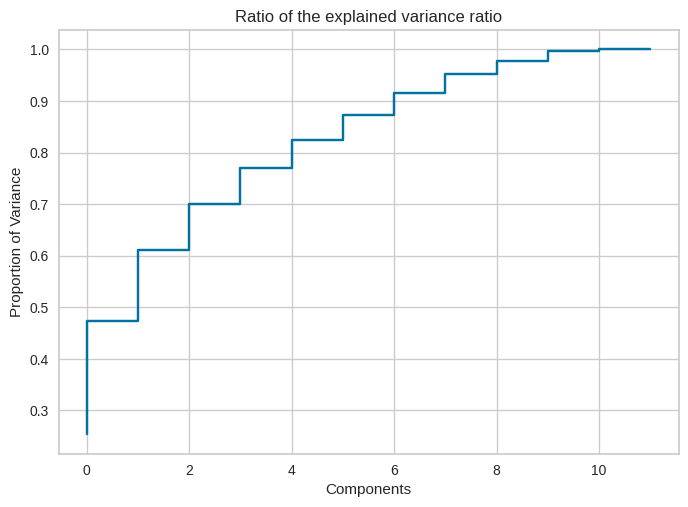

In [1057]:
PCA_data = PCA.explained_variance_ratio_.cumsum()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#plt.plot(PCA_data)
plt.step(x = x, y = PCA_data)
plt.title("Ratio of the explained variance ratio")
plt.xlabel("Components")
plt.ylabel("Proportion of Variance")
plt.show()

### 2.3 How many features are required to capture at least 90% of the variance? Drop the other features. (3pt)
You can get this number visually from the cumulative sum of explained_variance_ratio_ plot in the previous step. Alternatively, you can use numpy's *argwhere* function to find the index of the first element in the cumulative sum array that is greater than 0.9.

In [1058]:
pca_new = PCA_data[np.argwhere(PCA_data > .9)]
print("There are ", pca_new.size, " that captures atleast 90% variance")

There are  5  that captures atleast 90% variance


In [1059]:
df_pca = df.drop(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide'], axis=1)
df_pca

,density,pH,sulphates,alcohol,quality
0,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,1.034993,1.813090,0.193097,-0.915464,-0.937230
...,...,...,...,...,...
6492,-1.186161,0.320319,-0.210144,0.593818,0.207999
6493,0.067824,-0.426067,-0.478971,-0.747766,-0.937230
6494,-0.719251,-1.421248,-0.478971,-0.915464,0.207999
6495,-2.003251,0.755710,-1.016626,1.935402,1.353228


### 2.4 Import KElbowVisualizer from yellowbrick.cluster library and fit the data to it. Visualize the elbow curve and find the optimal number of clusters. (6pt)

*KElbowVisualizer* is a useful visualization tool for using Elbow method with K-Means clustering algorithm. The official documentation and example can be found here:
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


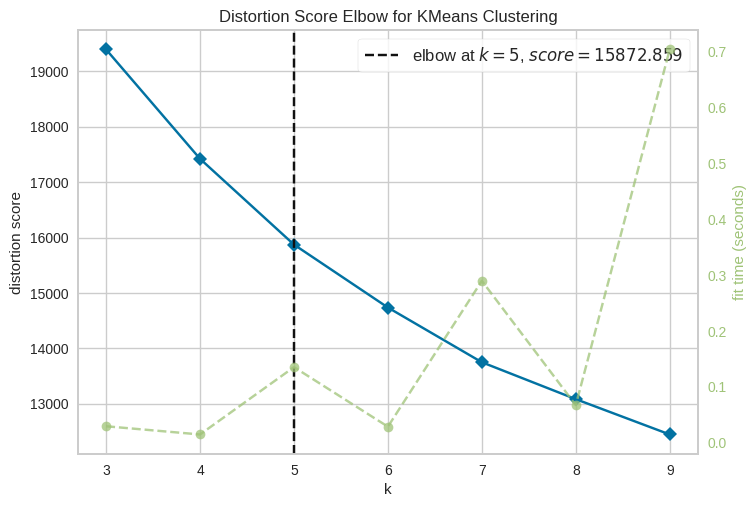

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1060]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_init = 'auto')
visualizer = KElbowVisualizer(model, k=(3, 10))

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### 2.5 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data to it. (2pt)

In [1061]:
KObject = KMeans(n_clusters=5,random_state=0, n_init="auto").fit(df_pca)

### 2.6 Get the labels from the fitted KMeans object (*labels_* method). Import *silhouette_score* from scikitlearn's metrics library. Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score. (1+1+2+3 =7pts)

In [1062]:
labels = KObject.labels_
from sklearn.metrics import silhouette_score
uniquelabels = pd.value_counts(labels, normalize=True).mul(100).round(1).astype(str) + '%'
score = silhouette_score(X = df_pca, labels = labels)
print(uniquelabels)
print("Silhouette score is ", score)

0    30.0%
2    20.6%
1    20.6%
4    19.1%
3     9.6%
dtype: object
Silhouette score is  0.1986111224429842


## 3. KMeans Clustering without PCA selection (Total 15 points)

### 3.1 Use KElbowVisualizer to find the optimal number of clusters for the data without PCA selection (ie the data with all the features). Also plot the score (similar to step 2.4) (3pt)

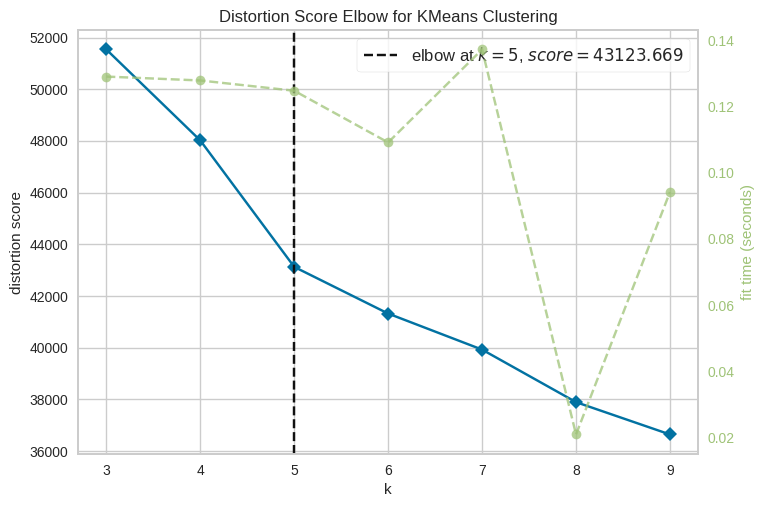

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1063]:
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42 )

# Instantiate the clustering model and visualizer
model = KMeans(n_init = 'auto')
visualizer = KElbowVisualizer(model, k=(3, 10))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### 3.2 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data (without PCA selection) to it. (2pt)

In [1064]:
newKObject = KMeans(n_clusters=5,random_state=0, n_init="auto").fit(df)

### 3.3 Retrieve the class labels from this KMeans object (from model's *labels_* method). Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score for the fitted data (without PCA selection) (2+2+3 =7pt)

In [1065]:
labels = newKObject.labels_
from sklearn.metrics import silhouette_score
uniquelabels = pd.value_counts(labels, normalize=True).mul(100).round(1).astype(str) + '%'
score = silhouette_score(X = df, labels = labels)
print(uniquelabels)
print("Silhouette score is ", score)

0    25.7%
4    25.3%
1    24.4%
3    15.1%
2     9.5%
dtype: object
Silhouette score is  0.17494523148811256


### 3.4 Discussion: Did PCA selection help in clustering (did it yield higher silhouette score)? Why or why not? (2-3 sentences) (3pt)

I got a higher silhouette score in the PCA than in the non-PCA. Looking at the Elbow graph, it looks like the one that is PCA follows the blue line more closely, leading to less distortion. It looks like PCA selection help in the clustering to make a better silhouette score.

## 4. Hierarchical (agglomerative) clustering (Total 10 points)

### 4.1 Import dendogram and linkage from scipy.cluster.hierarchy library. Use the *linkage* function to fit the data and plot the dendogram. (5pt)
An example is provided in the lecture slide. 

Official Documentation:
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

With the *linkage* function, you can use different linkage methods. For this assignment you can use 'ward' method.

(https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage:~:text=method%3D%E2%80%99ward%E2%80%99%20uses,the%20incremental%20algorithm.) 


(This can take a while to complete running)

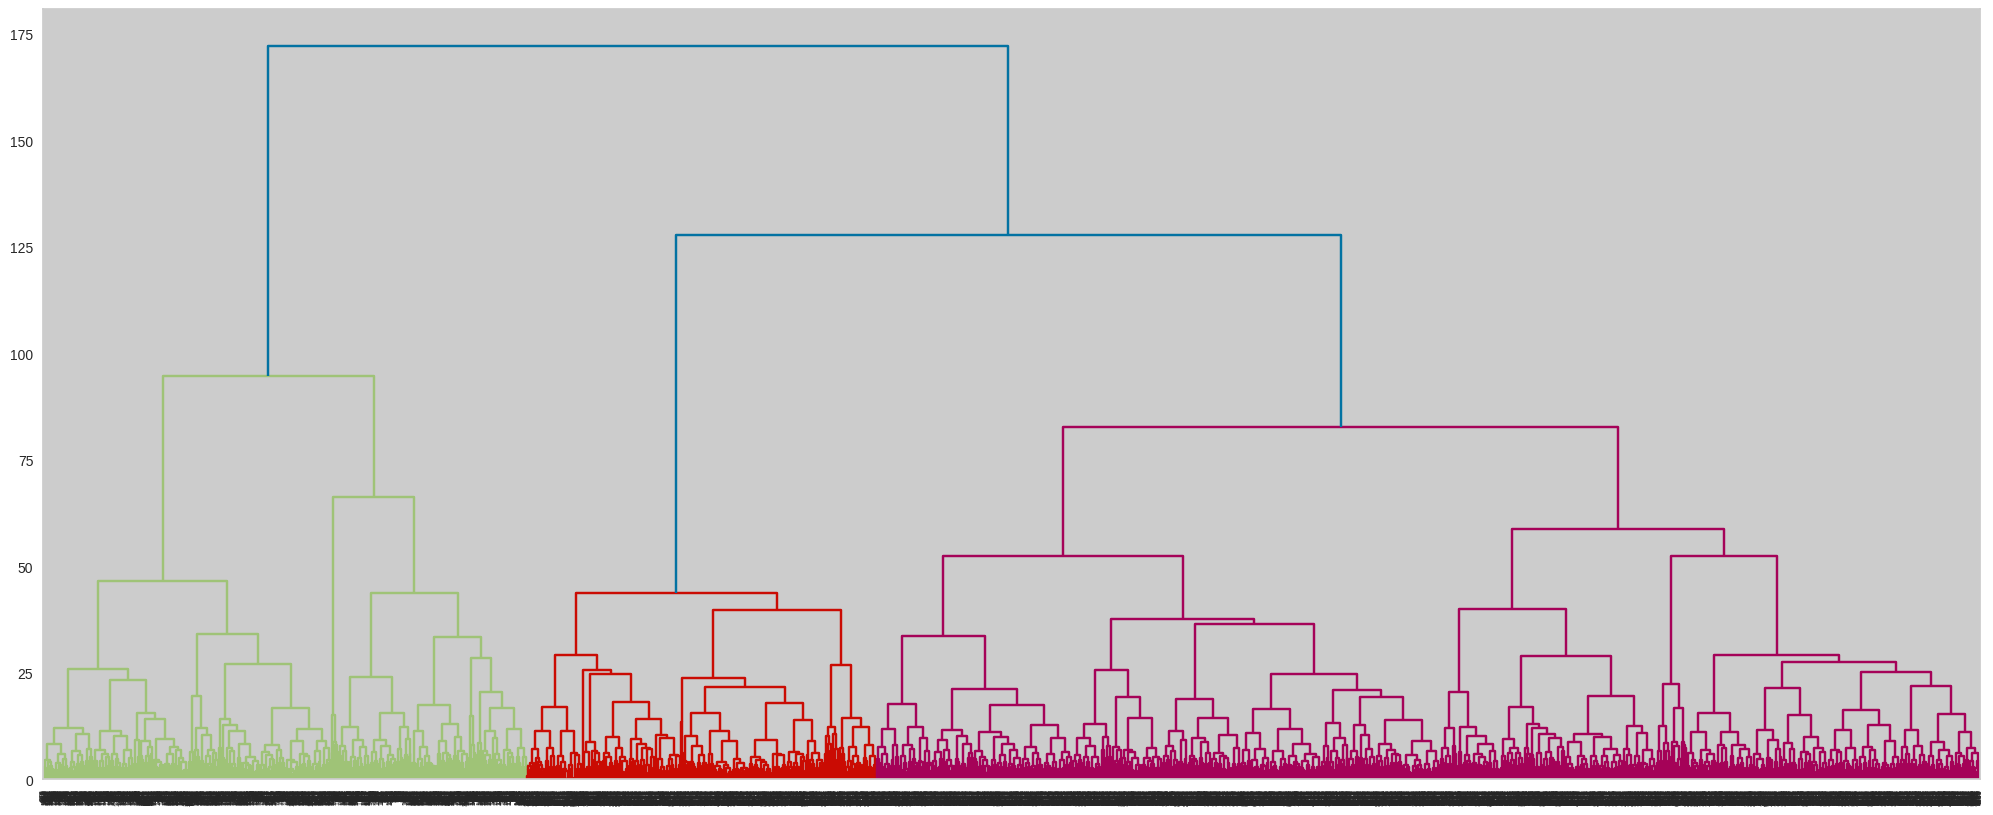

In [1066]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

### 4.2 Import AgglomerativeClustering from sklearn.cluster library. Use the fit_predict method to fit the data and print the corresponding silhouette score. (5pt)
(Use the above dendogram to find a suitable value for the number of clusters (*k*) in AgglomerativeClustering, OR run the algorithm multiple times with different values of *k* and print the *k* with the highest silhouette score)

In [1067]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = 2).fit_predict(df)

score = silhouette_score(X = df, labels = clustering)
print("Silhouette score is ", score)

Silhouette score is  0.24723028915844972


## 5. DBSCAN Clustering (Total 20 points)

### 5.1 Import *NearestNeighbors* from sklearn.neighbors library. Use the *fit* method to fit the data with n_neighbors=4. Then use *kneighbors* method to find the distance of the 4th nearest neighbor for each point. Sort and plot the distances. (6pt)
This plots the elbow curve (distance of the 4th nearest neighbor for each point). This is useful for finding the optimal value of epsilon for DBSCAN clustering. 

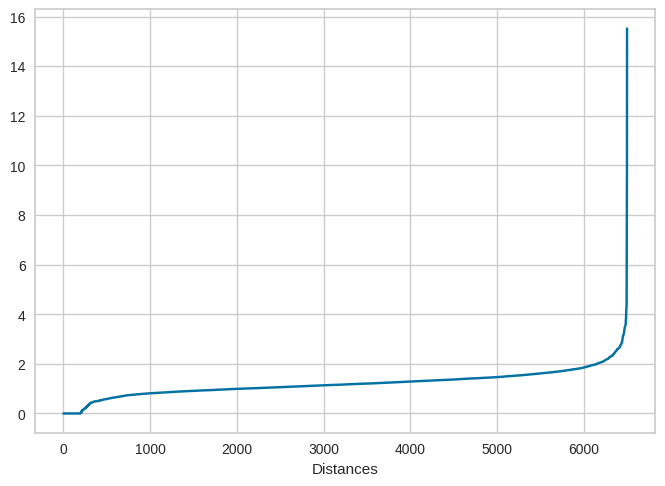

In [1068]:
from sklearn.neighbors import NearestNeighbors
NN = NearestNeighbors(n_neighbors = 4).fit(df)
distances, indices = NN.kneighbors(df)
distances = distances[distances[:, 3].argsort()]
plt.plot(distances[:, 3])
plt.xlabel("Distances")
plt.show()

### 5.2 From the distance plot above, estimate the 'elbow' point. The distance at the elbow point will be used as epsilon in the DBSCAN model. (2pt)
Simply write the distance value in the cell below.

6000, elbow point is at around 2.5

### 5.3 Import DBSCAN from sklearn.cluster library. Instantiate a DBSCAN model (with eps set to the elbow point suggested by above plot, and min_samples=10). (2pt)
(You can experiment with several values of eps and min_samples to find the best combination)

In [1173]:
from sklearn.cluster import DBSCAN

DBS = DBSCAN(eps=2.5, min_samples=10)

### 5.4 Use the fit method to fit your model to the data. Print (1) the value counts of unique class labels (from model's *labels_* method) in percentage, and (2) print the corresponding silhouette score. (2+2+2=6pt)

In [1174]:
DBS.fit(df)
DBS_df = pd.DataFrame(DBS.fit_predict(df))
df["cluster"] = DBS_df
uniquelabels = pd.value_counts(DBS.labels_, normalize=True).mul(100).round(1).astype(str) + '%'
score = silhouette_score(X = df, labels = DBS.labels_)
print(uniquelabels)
print("Silhouette score is ", score)

 0    98.2%
-1     1.6%
 1     0.2%
dtype: object
Silhouette score is  0.42544617438098936


### 5.5 Use seaborn's pairplot to plot the data with *hue* as the cluster labels obtained from DBSCAN. (2pt)
Set *corner* to *True* for a better visualization.

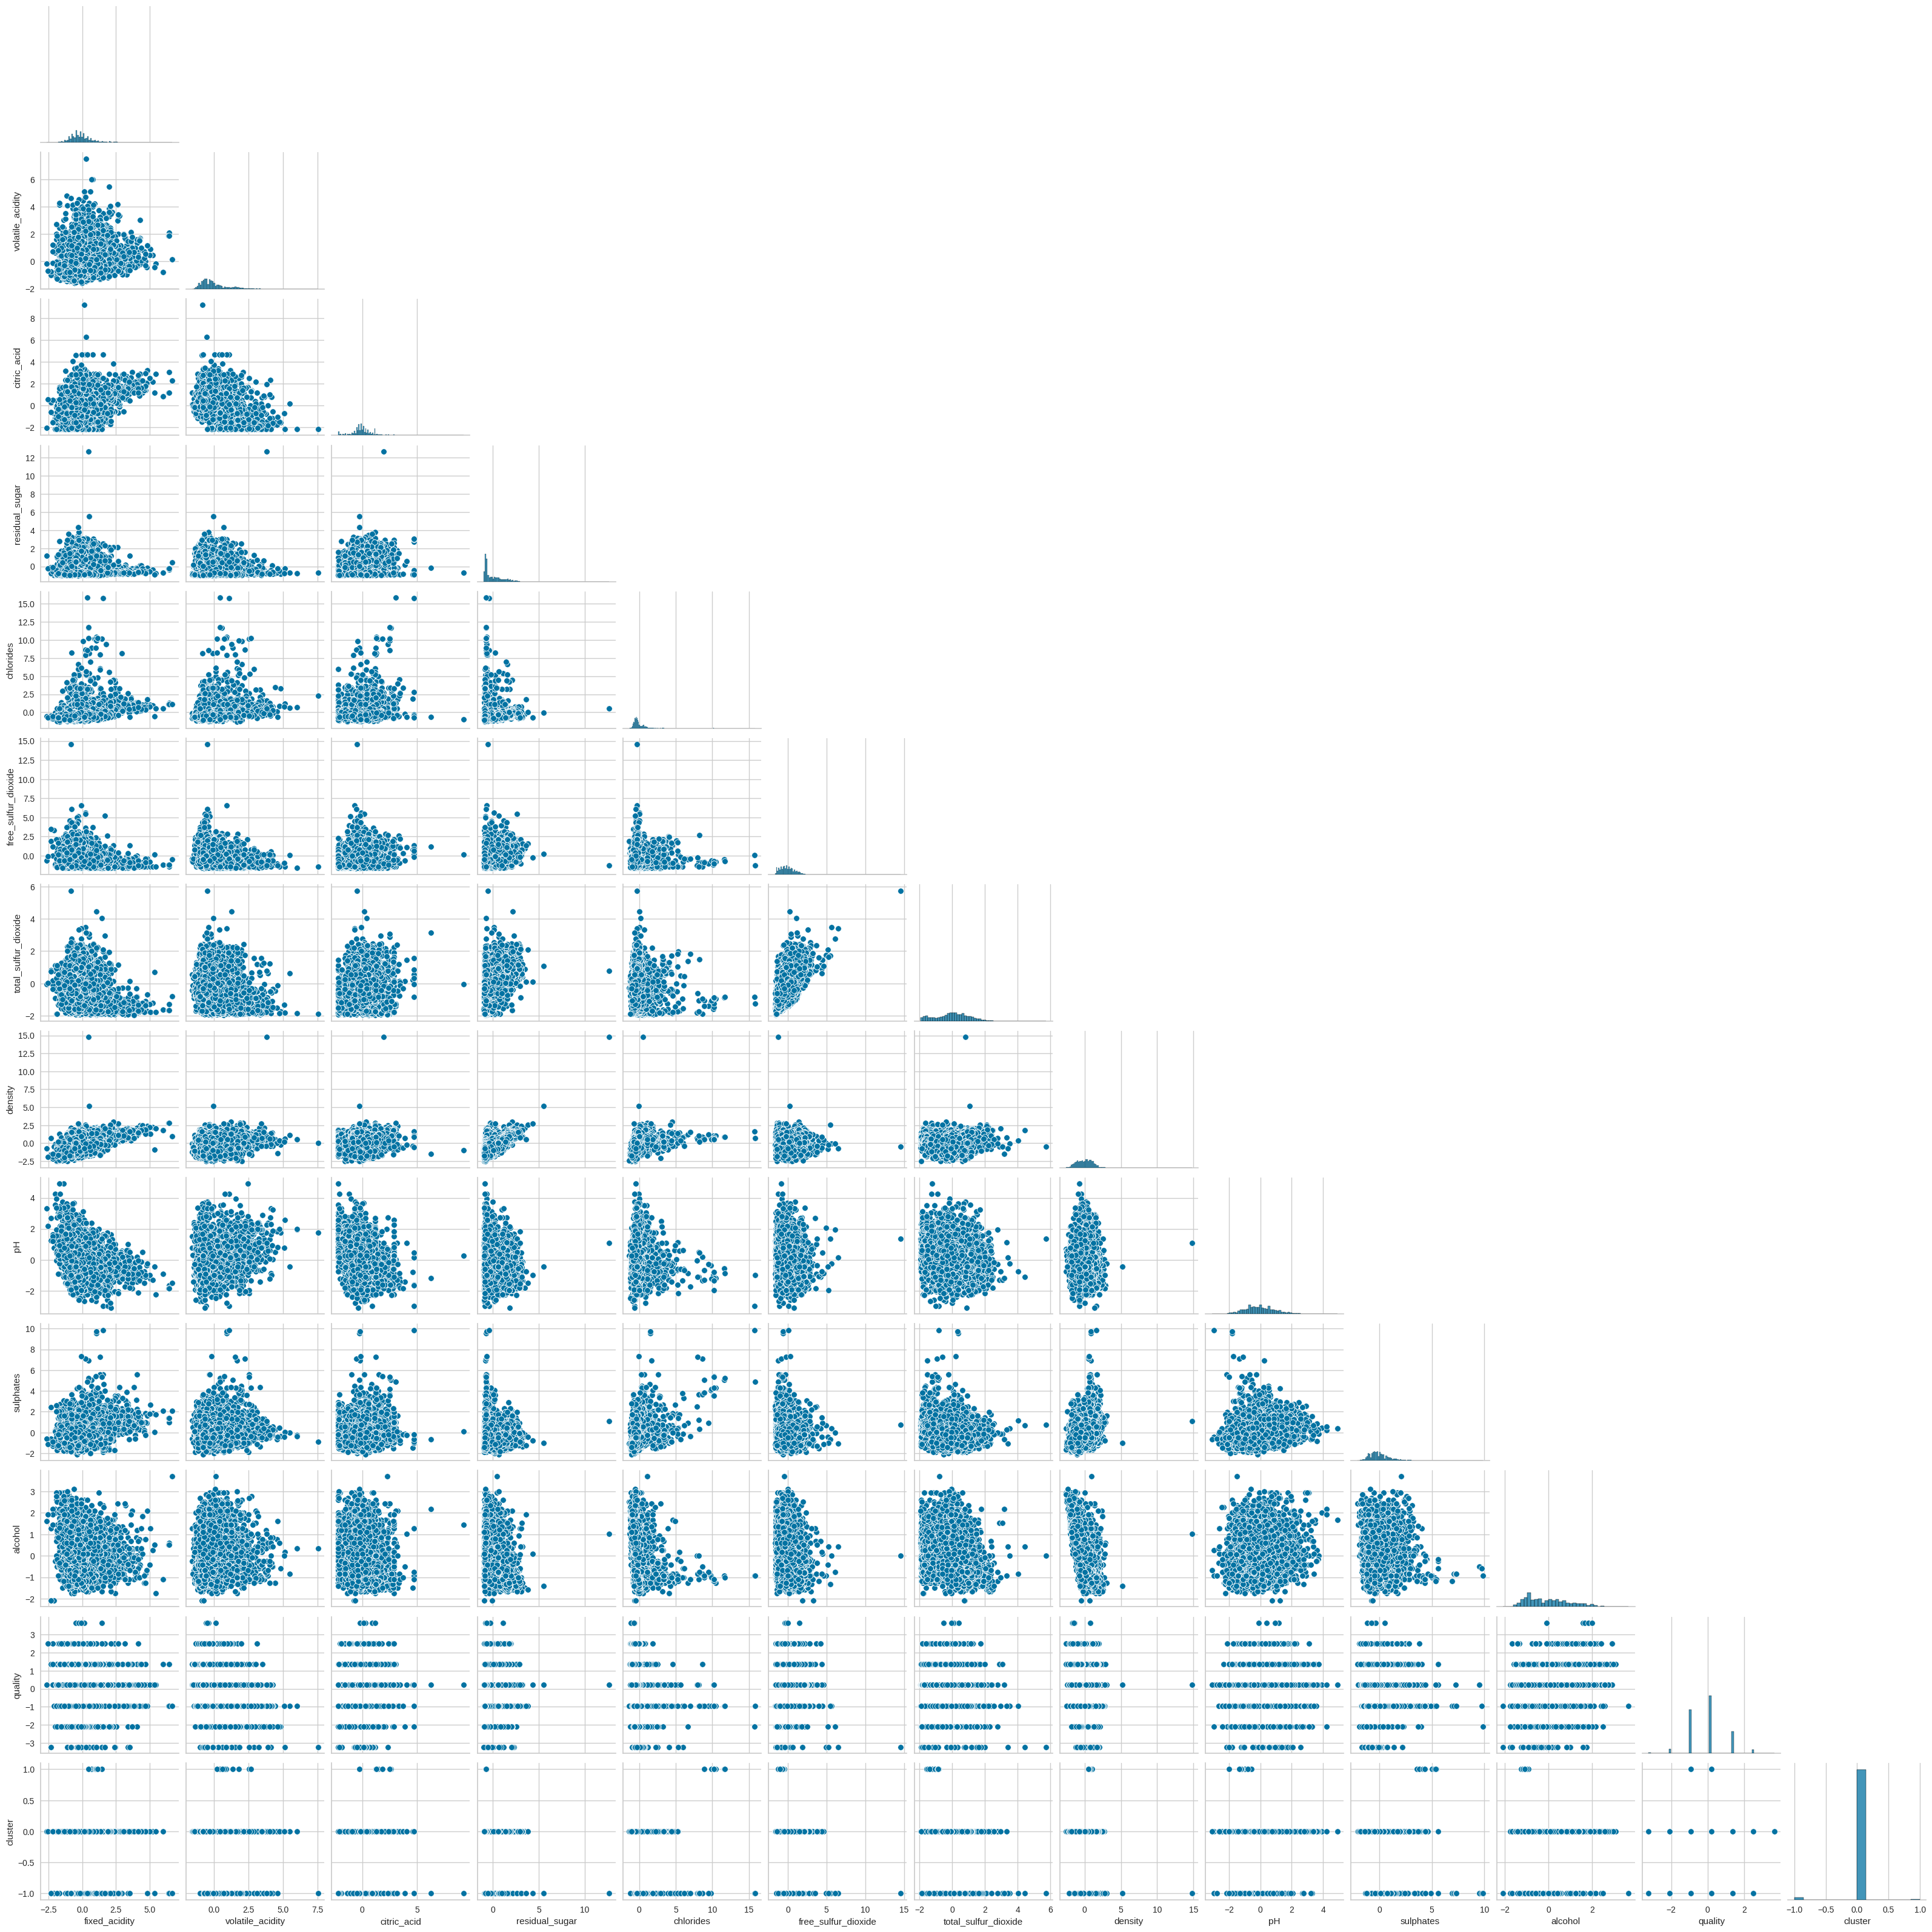

In [1181]:
sns.pairplot(data = df, corner = True)

## 6. Discussion: which clustering algorithm performed the best? Why? (2pt)
 (2-3 sentences)

The clustering algorithms that performed the best was the DBScan clustering algorithm. The DBScan out of all algorithms had the highest silhouette scores at 0.42. The K-Means with or without PCA Selection was less than .20. As for the hierachy clustering only had a silhouette score of 0.24. Finally the DBScan should have a 0.42 silhouette score, making it the best-performaning clustering algorithm.